# Machine Learning (ML) 

## Part I: Unsupervised Classification, Gaussian Mixture Model and K-Means clustering

<img src="clustering_algos.png" width=900/>

### Estimated Time: 45 mins

In [44]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 

from IPython import display
from IPython.display import Video, HTML         #embedding videos in the notebook
import time

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

%matplotlib inline

In [45]:
swarm=xr.open_dataset('swarm.nc') #load the saved data from the swarming model simulation
#xr.Dataset.close(swarm)

In [46]:
def plot_state(X,Y,theta,colors):   

    U=np.cos(theta)
    V=np.sin(theta)
    
    plt.scatter(X,Y,30,c=colors,alpha=0.5)
    plt.quiver(X,Y,U,V,colors, scale=30)
    plt.xlim((-1,1)); plt.ylim((-1,1))


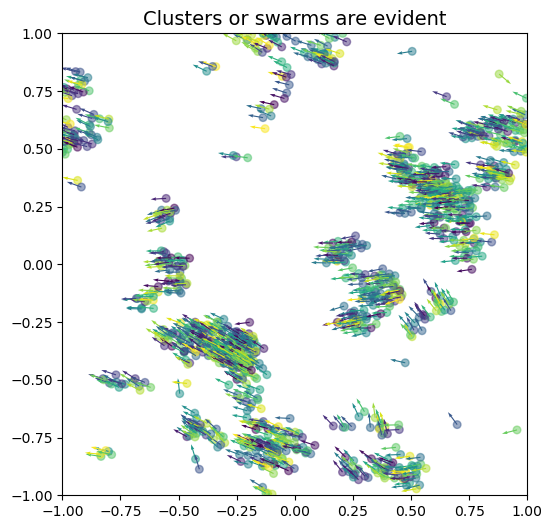

In [47]:
j=500;
fig = plt.figure(figsize=(6,6))
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],swarm.colors)
plt.title('Clusters or swarms are evident',fontsize=14);

# Clustering

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data analysis, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning. https://en.wikipedia.org/wiki/Cluster_analysis



## Gaussian Mixture Model

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. https://scikit-learn.org/stable/modules/mixture.html

In [48]:
j=200; #choose some time snapshot

features=np.stack((swarm.x[:,j],
              swarm.y[:,j],
              np.cos(swarm.th[:,j]),
              np.sin(swarm.th[:,j])),
              axis=1);

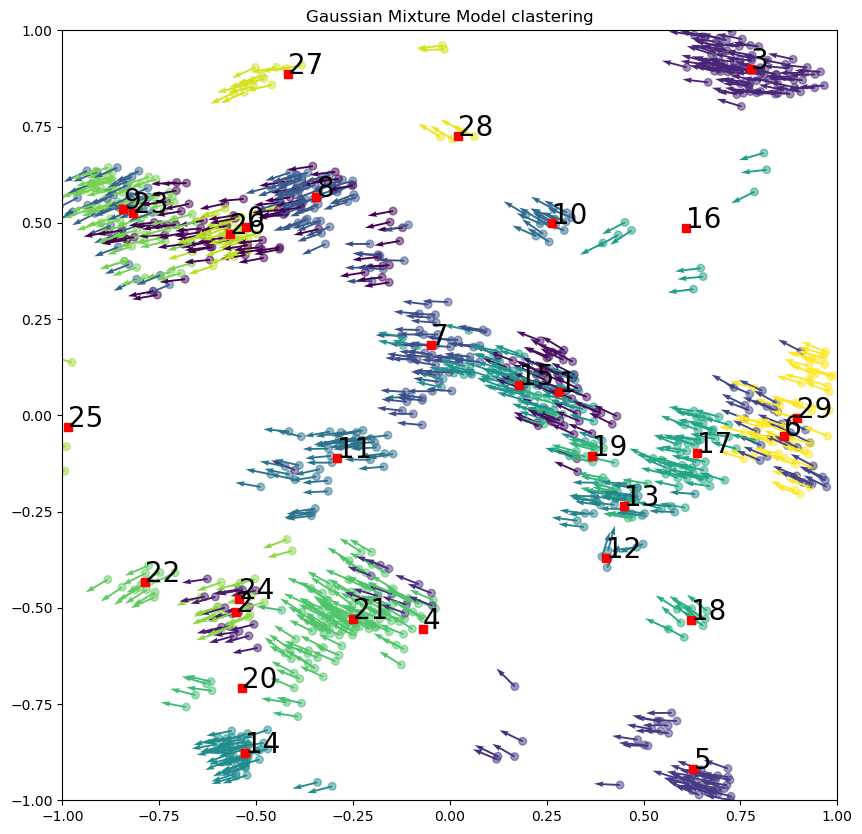

In [49]:
K=30 # number of clusters

gmm = GaussianMixture(n_components=K)
labels_gmm=gmm.fit_predict(features)
x_mean,y_mean=gmm.means_[:,0],gmm.means_[:,1]

fig = plt.figure(figsize=(10,10))
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels_gmm)
plt.title('Gaussian Mixture Model clastering')
for k in range(K):
    plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
    plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)    

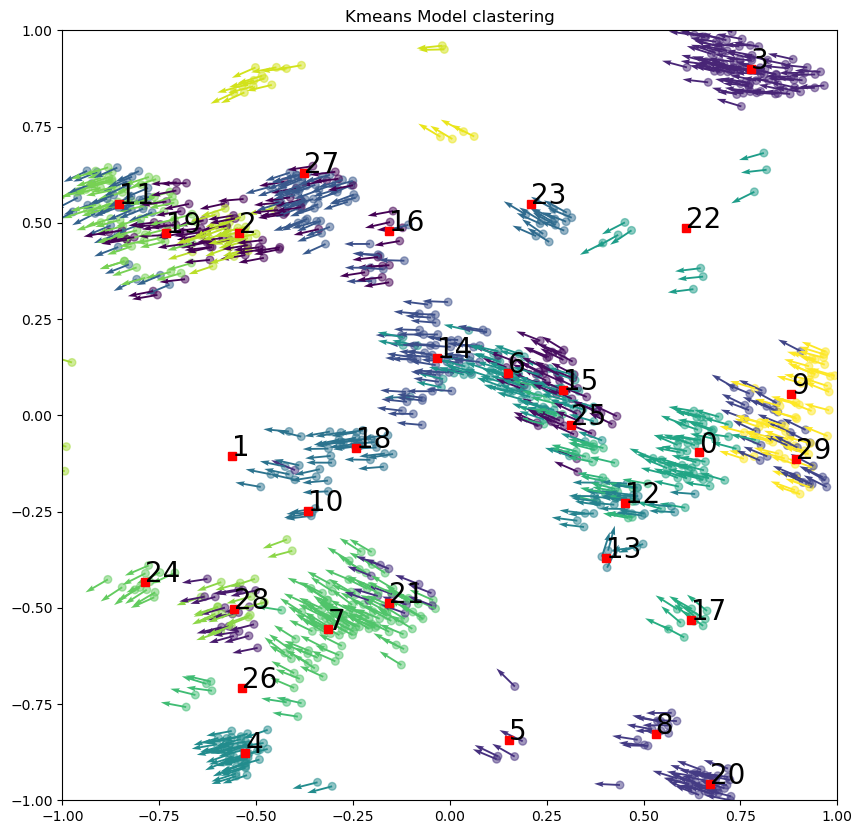

In [50]:
K=30 # number of clusters

kmeans = KMeans(n_clusters=K).fit(features)
labels=kmeans.labels_
x_mean, y_mean =kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

fig = plt.figure(figsize=(10,10))
plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels_gmm)
plt.title('Kmeans Model clastering')
for k in range(K):
    plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
    plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)    

## Bayesian information criterion (BIC)

In statistics, the Bayesian information criterion (BIC) or Schwarz information criterion (also SIC, SBC, SBIC) is a criterion for model selection among a finite set of models; models with lower BIC are generally preferred. It is based, in part, on the likelihood function and it is closely related to the Akaike information criterion (AIC).

When fitting models, it is possible to increase the likelihood by adding parameters, but doing so may result in overfitting. Both BIC and AIC attempt to resolve this problem by introducing a penalty term for the number of parameters in the model. https://en.wikipedia.org/wiki/Bayesian_information_criterion

Text(0, 0.5, 'Bayesian information criterion (BIC)')

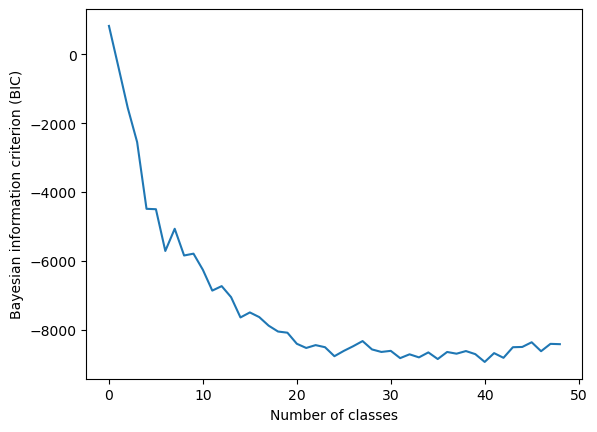

In [51]:
BIC=np.array([]);
for K in range(1,50):
    gmm = GaussianMixture(n_components=K)
    gmm.fit_predict(features)
    bic=gmm.bic(features)
    BIC=np.append(BIC,bic)

plt.plot(BIC); 
plt.xlabel('Number of classes'); 
plt.ylabel('Bayesian information criterion (BIC)')


In [52]:
K=15 #number of classes to use

## K-means clustering

K-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances). https://en.wikipedia.org/wiki/K-means_clustering

## In class exercise \#1: K-means clustering

- Follow an example of Gaussian Mixture Model above to cluster the data using the k-means algorithm. The sklearn documentation for k-means is here https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- Make the same plot as above that denotes the clusters with colors and plots the centers of clusters with their cluster numbers. Compare the clustering by GMM with k-means: which is better?


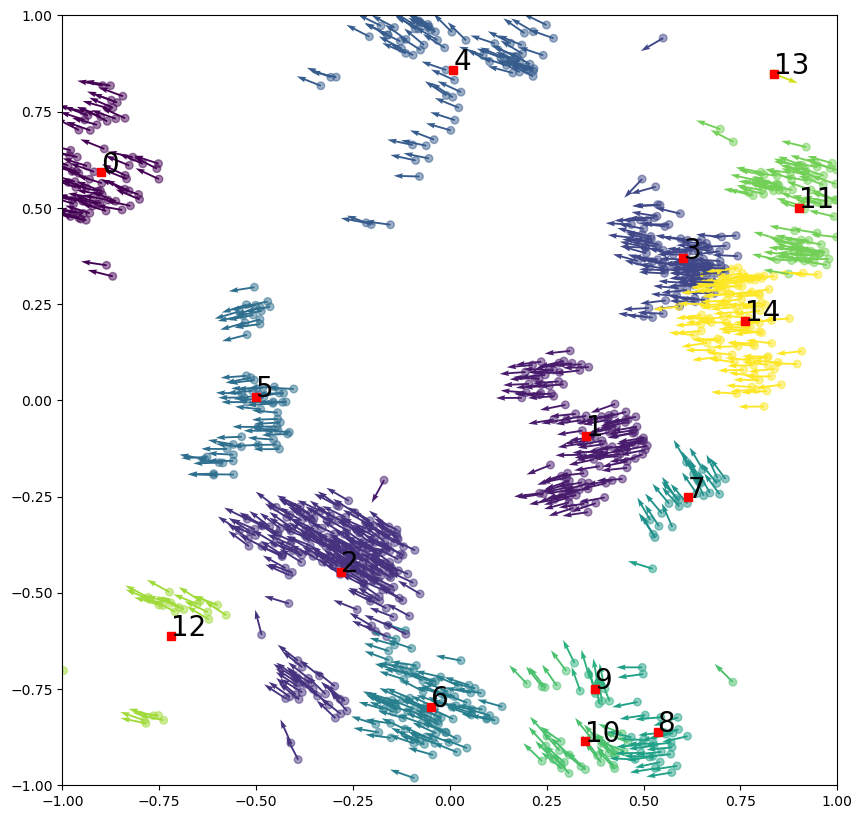

In [53]:
K=15

fig = plt.figure(figsize=(10,10))

for j in np.arange(400,500,5):
        
    features=np.stack((swarm.x[:,j],
              swarm.y[:,j],
              np.cos(swarm.th[:,j]),
              np.sin(swarm.th[:,j])),
              axis=1);
        
    kmeans = KMeans(n_clusters=K).fit(features)
    
    x_mean, y_mean =kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]
    
    labels=kmeans.labels_


    #plotting results
    display.display(plt.gcf()); plt.clf()
    
    plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels)   
    
    for k in range(K):
        plt.plot(x_mean[k],y_mean[k],'rs',markersize=6)
        plt.annotate(str(k), (x_mean[k],y_mean[k]), fontsize=20)
        
    display.clear_output(wait=True)
    
    time.sleep(0.01)

### The major problem with classifying fish into groups in the example above is that there is no consistency between time steps (see how cluster colors and numbers change for each time step)
###  Class exercise \#2: Think about ways of fixing this problem and modify the code above to ensure that groups stay coherent in time.

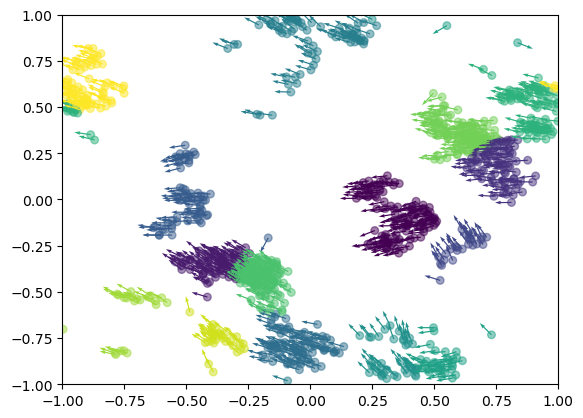

In [56]:
ax = plt.subplot()
cluster_centers = 'k-means++'

for j in np.arange(400,500,5):
        
    features=np.stack((np.cos(swarm.x[:,j]*np.pi),
                       np.sin(swarm.x[:,j]*np.pi),
                       np.cos(swarm.y[:,j]*np.pi),
                       np.sin(swarm.y[:,j]*np.pi),
                       np.cos(swarm.th[:,j]),
                       np.sin(swarm.th[:,j])),
                       axis=1);
        
    kmeans = KMeans(n_clusters=K, init=cluster_centers).fit(features)
    
    x_mean = np.arctan2(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0])/np.pi
    y_mean = np.arctan2(kmeans.cluster_centers_[:,3], kmeans.cluster_centers_[:,2])/np.pi
    labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_

    #plotting results
    display.display(plt.gcf()); plt.clf()
    
    plot_state(swarm.x[:,j],swarm.y[:,j],swarm.th[:,j],labels)   
        
    display.clear_output(wait=True)
    
    time.sleep(0.01)